Notebook to tune random forest

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import warnings
from k_fold import custom_k_fold, k_fold_cross_validation

In [2]:
df = pd.read_csv('../data/spambase_augmented.csv')

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('df shape : ' , df.shape)
print('X shape : ' , X.shape)
print('y shape : ', y.shape)

df shape :  (4600, 1186)
X shape :  (4600, 1185)
y shape :  (4600,)


Tuning Random Forests...
n_estimators=10, Validation Error: 0.0522
n_estimators=50, Validation Error: 0.0489
n_estimators=100, Validation Error: 0.0491
n_estimators=200, Validation Error: 0.0496
n_estimators=300, Validation Error: 0.0513
n_estimators=500, Validation Error: 0.0480
n_estimators=700, Validation Error: 0.0478
n_estimators=1000, Validation Error: 0.0454
n_estimators=1500, Validation Error: 0.0478
n_estimators=2000, Validation Error: 0.0498


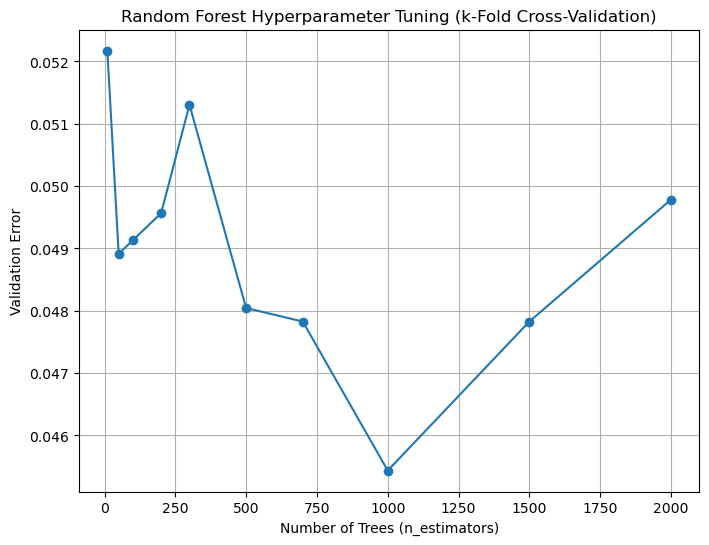


Best Random Forest Hyperparameter:
Optimal n_estimators = 1000, with Validation Error = 0.0454


In [4]:
n_estimators_list = [10, 50, 100, 200, 300, 500, 700, 1000, 1500, 2000]

rf_errors = {}

best_n_rf = None
best_rf_error = float('inf')

print("Tuning Random Forests...")

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, max_features="sqrt", criterion="gini")

    val_error = k_fold_cross_validation(X, y, model, k=5)  
    
    rf_errors[n] = val_error

    print(f"n_estimators={n}, Validation Error: {val_error:.4f}")
    
    # Track the best model
    if val_error < best_rf_error:
        best_rf_error = val_error
        best_n_rf = n

plt.figure(figsize=(8, 6))
plt.plot(list(rf_errors.keys()), list(rf_errors.values()), marker='o', linestyle='-')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation Error")
plt.title("Random Forest Hyperparameter Tuning (k-Fold Cross-Validation)")
plt.grid(True)
plt.show()

print("\nBest Random Forest Hyperparameter:")
print(f"Optimal n_estimators = {best_n_rf}, with Validation Error = {best_rf_error:.4f}")

In [5]:
print(rf_errors)

{10: 0.05217391304347827, 50: 0.048913043478260865, 100: 0.0491304347826087, 200: 0.04956521739130435, 300: 0.05130434782608695, 500: 0.04804347826086952, 700: 0.04782608695652173, 1000: 0.04543478260869564, 1500: 0.047826086956521706, 2000: 0.04978260869565217}


In [8]:
for k,v in rf_errors.items():
    print(f"ensemble size : {k}")
    print(f"error : {v}")
    print('--------------------------------')

ensemble size : 10
error : 0.05217391304347827
--------------------------------
ensemble size : 50
error : 0.048913043478260865
--------------------------------
ensemble size : 100
error : 0.0491304347826087
--------------------------------
ensemble size : 200
error : 0.04956521739130435
--------------------------------
ensemble size : 300
error : 0.05130434782608695
--------------------------------
ensemble size : 500
error : 0.04804347826086952
--------------------------------
ensemble size : 700
error : 0.04782608695652173
--------------------------------
ensemble size : 1000
error : 0.04543478260869564
--------------------------------
ensemble size : 1500
error : 0.047826086956521706
--------------------------------
ensemble size : 2000
error : 0.04978260869565217
--------------------------------
